# **Comparison of Statistical Learning Models for a Fraud Detection Application**

This notebook tries to analyze and extract information form a large dataset regarding supply chain business from DataCo company. The dataset holds several features, ranging from revenues to cateogory of items bought per customer.
<br />
Our goal was to extract useful information about the overwiev of the businesses and to analyze fraud suspicion.
<br />
In particular, several classification models have been utilized to perform prediction about frauds detection, then comparing them in order to analyze their performances.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score, precision_score

### **Data Cleaning & Wrangling**

In [2]:
url = 'https://raw.githubusercontent.com/ashishpatel26/DataCo-SMART-SUPPLY-CHAIN-FOR-BIG-DATA-ANALYSIS/main/DataCoSupplyChainDataset.csv'
data = pd.read_csv(url, header=0, encoding='unicode_escape')
pd.set_option('display.max_columns', None)

In [3]:
data.shape

(180519, 53)

In [92]:
data.tail(10)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late Delivery Risk,Category Name,Customer City,Customer Country,Customer Id,Customer Name,Customer Segment,Customer State,Customer Zipcode,Department Id,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,Shipping Delta,Fraud
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,20755,Cally Holloway,Consumer,PR,725.0,2,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,77202,13.110000,0.04,180517,0.29,1,327.75,314.640015,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,Standard Class,-1,0
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,19492,Irene Luna,Consumer,PR,725.0,2,Pacific Asia,Bikaner,India,1/13/2018 12:27,75939,16.389999,0.05,179254,-0.80,1,327.75,311.359985,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,Standard Class,1,0
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,19491,Gillian Maldonado,Consumer,CA,95125.0,2,Pacific Asia,Bikaner,India,1/13/2018 12:06,75938,18.030001,0.06,179253,-0.80,1,327.75,309.720001,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,Standard Class,0,0
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,19490,Tana Tate,Home Office,CA,90027.0,2,Pacific Asia,Townsville,Australia,1/13/2018 11:45,75937,22.940001,0.07,179252,0.08,1,327.75,304.809998,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,Standard Class,-1,0
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,19489,Orli Hendricks,Corporate,PR,725.0,2,Pacific Asia,Townsville,Australia,1/13/2018 11:24,75936,29.500000,0.09,179251,0.45,1,327.75,298.250000,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,Standard Class,-2,0
5,TRANSFER,6,4,18.580000,294.980011,Shipping canceled,0,Sporting Goods,Tonawanda,EE. UU.,19488,Kimberly Flowers,Consumer,NY,14150.0,2,Pacific Asia,Toowoomba,Australia,1/13/2018 11:03,75935,32.779999,0.10,179250,0.06,1,327.75,294.980011,Oceania,Queensland,CANCELED,1360,73,Smart watch,327.75,Standard Class,2,0
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,19487,Constance Terrell,Home Office,PR,725.0,2,Pacific Asia,Guangzhou,China,1/13/2018 10:42,75934,39.330002,0.12,179249,0.33,1,327.75,288.420013,Eastern Asia,Guangdong,COMPLETE,1360,73,Smart watch,327.75,First Class,1,0
7,TRANSFER,2,1,68.430000,285.140015,Late delivery,1,Sporting Goods,Miami,EE. UU.,19486,Erica Stevens,Corporate,FL,33162.0,2,Pacific Asia,Guangzhou,China,1/13/2018 10:21,75933,42.610001,0.13,179248,0.24,1,327.75,285.140015,Eastern Asia,Guangdong,PROCESSING,1360,73,Smart watch,327.75,First Class,1,0
8,CASH,3,2,133.720001,278.589996,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,19485,Nichole Olsen,Corporate,PR,725.0,2,Pacific Asia,Guangzhou,China,1/13/2018 10:00,75932,49.160000,0.15,179247,0.48,1,327.75,278.589996,Eastern Asia,Guangdong,CLOSED,1360,73,Smart watch,327.75,Second Class,1,0
9,CASH,2,1,132.149994,275.309998,Late delivery,1,Sporting Goods,San Ramon,EE. UU.,19484,Oprah Delacruz,Corporate,CA,94583.0,2,Pacific Asia,Guangzhou,China,1/13/2018 9:39,75931,52.439999,0.16,179246,0.48,1,327.75,275.309998,Eastern Asia,Guangdong,CLOSED,1360,73,Smart watch,327.75,First Class,1,0


Description of the features:
* `Type` Type of transaction made
* `Days for shipping (real)` Actual shipping days of the purchased product
* `Days for shipment (schedule)` Days of scheduled delivery of the purchased product
* `Benefit per order` Earnings per order placed
* `Sales per customer` Total sales per customer made per customer
* `Delivery Status` Delivery status of orders
* `Late_delivery_risk` Categorical variable that indicates if sending is late (1) or on time (0)
* `Category Id` Product category code
* `Category Name` Description of the product category
* `Customer City` City where the customer made the purchase
* `Customer Country` Country where the customer made the purchase
* `Customer Email` Customer's emai
* `Customer Fname` Customer name
* `Customer Id` Customer ID
* `Customer Lname` Customer lastname
* `Customer Password` Masked customer key
* `Customer Segment` Types of Customers: Consumer, Corporate, Home, Office
* `Customer State` State to which the store where the purchase is registered belongs
* `Customer Street` Street to which the store where the purchase is registered belongs
* `Customer Zipcode` Customer Zipcode
* `Department Id` Department code of store
* `Department Name` Department name of store
* `Latitude` Latitude corresponding to location of store
* `Longitude` Longitude corresponding to location of store
* `Market` Market to where is delivered: Africa, Europe, LATM, Pacific Asia, USCA
* `Order City` Destination city of the order
* `Order Country` Destination country of the order
* `Order Customer Id` Customer order code
* `order date (DateOrders)` Date on which the order is made
* `Order Id` Order code
* `Order Item Cardprod Id` Product code generated through the RFID reader
* `Order Item Discount Rate` Order item discount percentage
* `Order Item Id` Order item code
* `Order Item Product Price` Price of products without discount
* `Order Item Profit Ratio` Order Item Profit Ratio
* `Order Item Quantity` Number of products per order
* `Sales` Value in sales
* `Order Item Total` Total amount per order
* `Order Profit per Order` Order Profit per Order
* `Order Region` Region of the world where the order is delivered
* `Order State` State of the region where the order is delivered
* `Order Status` COMPLETE, PENDING, CLOSED, PENDING_PAYMENT, CANCELED, PROCESSING...
* `Product Card Id` Product code
* `Product Category Id` Product category code
* `Product Description` Product description
* `Product Image` Link of visit and purchade of the product
* `Product Name` Product name
* `Product Price` Product price
* `Product Status` Status of the product stock: not available (1), available (0)
* `Shipping date (DateOrders)` Exact date and time of shipment
* `Shipping Mode` Shipping mode

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [6]:
i = 0

for feature in data.columns:
  if len(data[data[feature].isnull()]) > 0:
    print(str(i) + ') {null_values} null values out of {length} for column "{feature}"'.format(
        length=len(data),
        null_values=data[feature].isnull().sum(),
        feature=feature
    ))
  i += 1

del i

14) 8 null values out of 180519 for column "Customer Lname"
19) 3 null values out of 180519 for column "Customer Zipcode"
43) 155679 null values out of 180519 for column "Order Zipcode"
46) 180519 null values out of 180519 for column "Product Description"


We can definetely drop `Order Zipcode` and `Product Description`.

In [7]:
data.drop(['Order Zipcode', 'Product Description'], axis=1, inplace=True)

We shall see which records miss `Customer Zipcode` values, in order to figure out how to replace them.

In [8]:
data[data['Customer Zipcode'].isnull()]

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
35704,DEBIT,2,1,66.379997,189.660004,Late delivery,1,65,Consumer Electronics,CA,EE. UU.,XXXXXXXXX,Sara,14577,Foreman,XXXXXXXXX,Consumer,95758,Elk Grove,NaN,10,Technology,39.134159,-123.718552,Europe,Valence,Francia,14577,11/2/2017 18:31,71024,1352,63.220001,0.25,174339,252.880005,0.35,1,252.880005,189.660004,66.379997,Western Europe,Auvernia-Ródano-Alpes,COMPLETE,1352,65,http://images.acmesports.sports/Industrial+con...,Industrial consumer electronics,252.880005,0,11/4/2017 18:31,First Class
46440,PAYMENT,4,4,10.910000,38.959999,Shipping on time,0,75,Video Games,CA,EE. UU.,XXXXXXXXX,Eugenia,17171,Slater,XXXXXXXXX,Corporate,95758,Elk Grove,NaN,9,Discs Shop,38.408573,-121.449112,Pacific Asia,Manila,Filipinas,17171,12/10/2017 15:18,73618,1362,0.800000,0.02,176933,39.750000,0.28,1,39.750000,38.959999,10.910000,Southeast Asia,Capital Nacional,PENDING_PAYMENT,1362,75,http://images.acmesports.sports/Fighting+video...,Fighting video games,39.750000,0,12/14/2017 15:18,Standard Class
82511,DEBIT,4,4,59.990002,299.959992,Shipping on time,0,63,Children's Clothing,CA,EE. UU.,XXXXXXXXX,Zena,14046,Elliott,XXXXXXXXX,Consumer,91732,El Monte,NaN,4,Apparel,34.071892,-118.013886,Europe,Sheffield,Reino Unido,14046,10/26/2017 0:29,70493,1350,57.139999,0.16,173808,357.100006,0.20,1,357.100006,299.959992,59.990002,Northern Europe,Inglaterra,COMPLETE,1350,63,http://images.acmesports.sports/Children+heaters,Children's heaters,357.100006,0,10/30/2017 0:29,Standard Class


In [9]:
data[data['Customer State'] == '95758']

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
35704,DEBIT,2,1,66.379997,189.660004,Late delivery,1,65,Consumer Electronics,CA,EE. UU.,XXXXXXXXX,Sara,14577,Foreman,XXXXXXXXX,Consumer,95758,Elk Grove,NaN,10,Technology,39.134159,-123.718552,Europe,Valence,Francia,14577,11/2/2017 18:31,71024,1352,63.220001,0.25,174339,252.880005,0.35,1,252.880005,189.660004,66.379997,Western Europe,Auvernia-Ródano-Alpes,COMPLETE,1352,65,http://images.acmesports.sports/Industrial+con...,Industrial consumer electronics,252.880005,0,11/4/2017 18:31,First Class
46440,PAYMENT,4,4,10.910000,38.959999,Shipping on time,0,75,Video Games,CA,EE. UU.,XXXXXXXXX,Eugenia,17171,Slater,XXXXXXXXX,Corporate,95758,Elk Grove,NaN,9,Discs Shop,38.408573,-121.449112,Pacific Asia,Manila,Filipinas,17171,12/10/2017 15:18,73618,1362,0.800000,0.02,176933,39.750000,0.28,1,39.750000,38.959999,10.910000,Southeast Asia,Capital Nacional,PENDING_PAYMENT,1362,75,http://images.acmesports.sports/Fighting+video...,Fighting video games,39.750000,0,12/14/2017 15:18,Standard Class


None of other customers live in the same country as Sara Foreman and Eugenia Slater, so no `Order Zipcode` can be inserted.

In [10]:
data[data['Customer State'] == '91732']

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
82511,DEBIT,4,4,59.990002,299.959992,Shipping on time,0,63,Children's Clothing,CA,EE. UU.,XXXXXXXXX,Zena,14046,Elliott,XXXXXXXXX,Consumer,91732,El Monte,NaN,4,Apparel,34.071892,-118.013886,Europe,Sheffield,Reino Unido,14046,10/26/2017 0:29,70493,1350,57.139999,0.16,173808,357.100006,0.2,1,357.100006,299.959992,59.990002,Northern Europe,Inglaterra,COMPLETE,1350,63,http://images.acmesports.sports/Children+heaters,Children's heaters,357.100006,0,10/30/2017 0:29,Standard Class


The same info cannot be retrieved for Zena Elliott.
<br>
Since there are only 3 tuples that have a `NaN` value for the `Customer Zipcode` variable, we shall just replace them with a 0.

In [11]:
data['Customer Zipcode'].fillna('0', inplace=True)

Let's move on.
<br>
We shall feature engineer some variables, like the full name of customers, and drop some other columns.

In [12]:
data['Customer Name'] = data['Customer Fname'] + ' ' + data['Customer Lname']
customer_name = data.pop('Customer Name')
data.insert(data.columns.get_loc('Customer Id') + 1, 'Customer Name', customer_name)

We shall replace the missing names with a generic name, being only 8 samples that miss this information. Let's say Mario Rossi.

In [13]:
data['Customer Name'].fillna('Mario Rossi', inplace=True)

To simplify our dataset, some columns containing non-useful infos are dropped.

In [14]:
data.drop([
           'Customer Fname',
           'Customer Lname',
           'Customer Email',
           'Customer Password',
           'Product Status',
           'Customer Street',
           'Latitude',
           'Longitude',
           'Product Image',
           'shipping date (DateOrders)'
           ], axis=1, inplace=True)

We also note that many columns repeat themselves, meaning they have the same identical values for every sample, but they are named differently.

In [15]:
data['Order Customer Id'].equals(data['Customer Id']),
data['Benefit per order'].equals(data['Order Profit Per Order']),
data['Order Item Cardprod Id'].equals(data['Product Card Id']),
data['Order Item Product Price'].equals(data['Product Price']),
data['Product Category Id'].equals(data['Category Id'])

True

We also note that `Department Id` and `Department Name` have the same purpose, so it is a repetition as well.

In [16]:
data['Department Name'].nunique() == data['Department Id'].nunique()

True

We can definetely drop the repetitions.

In [17]:
data.drop([
           'Department Name',
           'Order Customer Id',
           'Order Profit Per Order',
           'Order Item Cardprod Id',
           'Order Item Product Price',
           'Category Id'
           ], inplace = True, axis = 1)

In [18]:
data.rename(columns={'Late_delivery_risk':'Late Delivery Risk'}, inplace=True)

`Shipping Delta` stands for the difference between the real and scheduled days for shipment: the bigger the difference the slower the order arrived at destination.
<br>
A negative value stands for a quicker delivery.

In [19]:
data['Shipping Delta'] = data['Days for shipping (real)'] - data['Days for shipment (scheduled)']

Now let's focus on the fraud detection. Being this a classification analysis, we shall have two possible answers to our questions:
*   `True` - it is a fraud or
*   `False` - it is not.
<br>

This said, we shall create a new column which holds `1` for a suspected fraud, and `0` for a normal transaction.

In [20]:
data['Order Status'].value_counts()

COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: Order Status, dtype: int64

In [21]:
data['Fraud'] = np.where(data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)

### **Data Visualization**




First of all, correlations:

In [22]:
# Detecting features that do not contain identity values, namely the IDs
columns = [column for column in data.columns if 'Id' not in column]

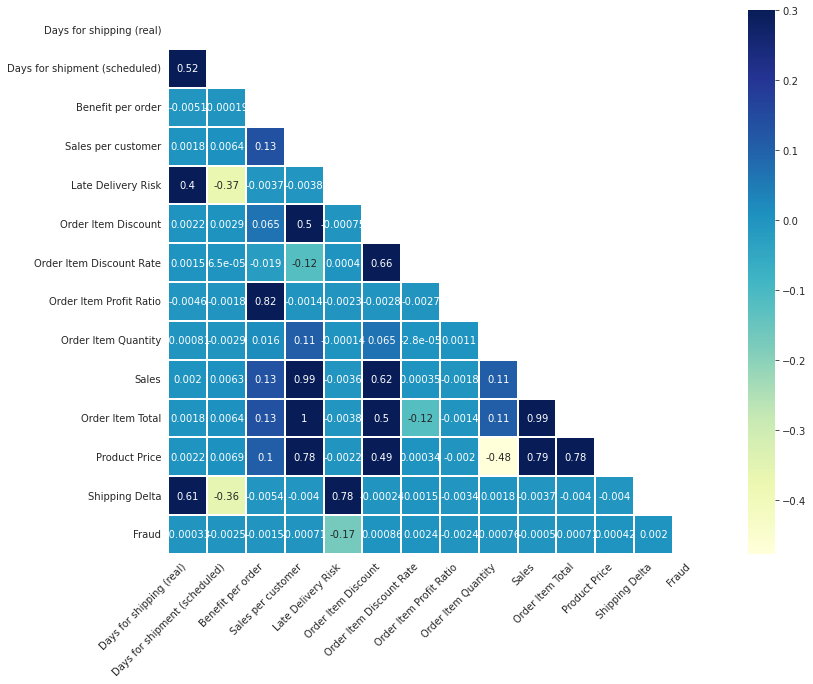

In [23]:
mask = np.zeros_like(data[columns].corr())
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13,10))
    ax = sns.heatmap(data[columns].corr(),
                     mask=mask,
                     vmax=.3,
                     square=True,
                     annot=True,
                     linewidth=.1,
                     cmap='YlGnBu',
                     )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )

From the correlation matrix different patterns are enlightened, although the majority of them are pretty intuitive:

- `Price` is strongly positively related to `Sales`, `Sales per customer` and `Order Item Total` but negatively related to `Order Item Quantity`.
- The more discount, the more sales and order total.

Since no useful information is being held by these correlations, we shall move on to consider the suspected frauds in relation to other parameters.

<hr>

**General overview of the top Markets and favorite product categories.**
<br>

The first thing that is going to be visualized is a general overview of the main data regarding how sales are distributed geographically. After that, the focus is shifted on which product category was the most sold across all the orders.

In [24]:
market = data.groupby('Market')['Sales per customer'].sum().sort_values(ascending=False)
region = data.groupby('Order Region')['Sales per customer'].sum().sort_values(ascending=False)

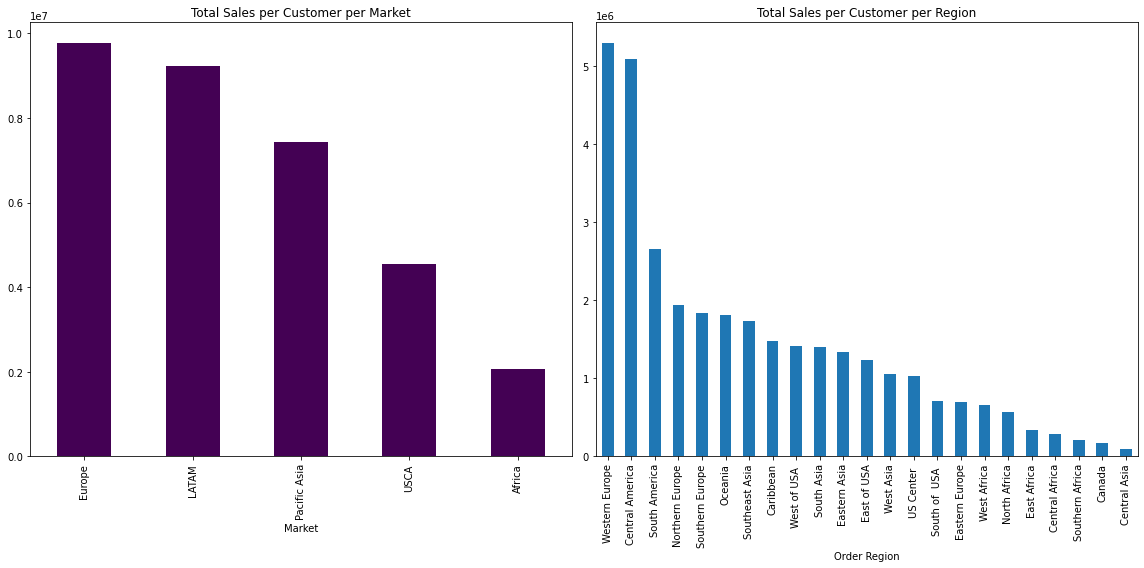

In [25]:
fig, ax = plt.subplots(ncols=2, figsize=(16,8))

market.plot.bar(ax=ax[0],
                title='Total Sales per Customer per Market',
                colormap='viridis')

region.plot.bar(ax=ax[1],
                title='Total Sales per Customer per Region')

plt.tight_layout();

In [26]:
cat_total = data.groupby('Category Name')['Sales per customer'].sum().sort_values(ascending=False)
cat_avg = data.groupby('Category Name')['Sales per customer'].mean().sort_values(ascending=False)

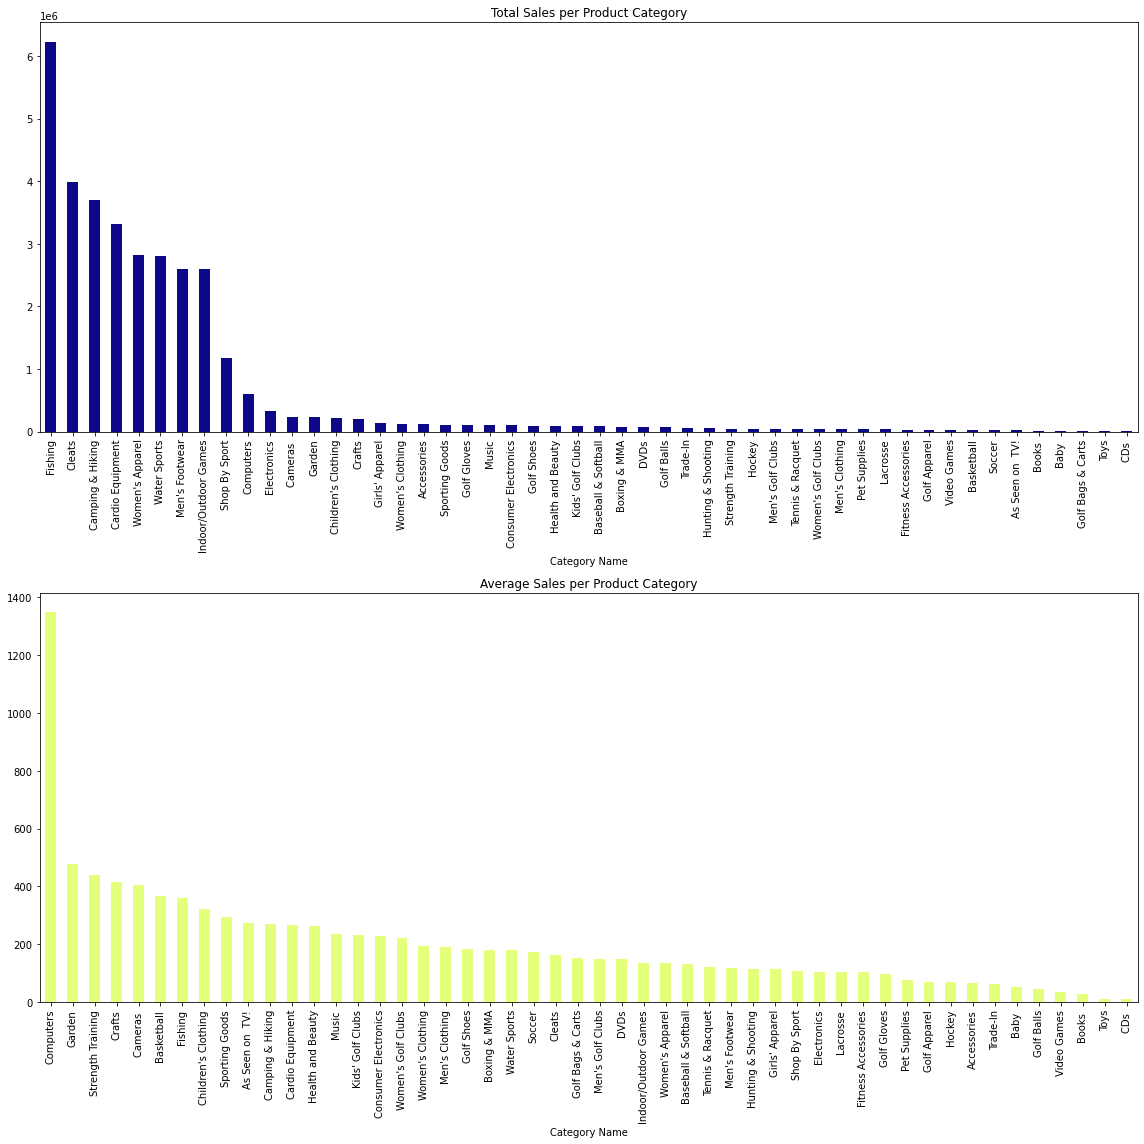

In [27]:
fig, ax = plt.subplots(nrows=2, figsize=(16, 16))

cat_total.plot.bar(ax=ax[0],
                   title='Total Sales per Product Category',
                   colormap='plasma')

cat_avg.plot.bar(ax=ax[1],
                 title='Average Sales per Product Category',
                 colormap='Wistia')

plt.tight_layout();

It is noticed that many orders are having a negative benefit per order. Which products have the most impact regarding this issue?

In [28]:
print('The percentage of orders with negative benefit is {}%'.format(
    round(data['Benefit per order'][data['Benefit per order'] < 0].count() / data['Benefit per order'].count() * 100, 2)
))

The percentage of orders with negative benefit is 18.71%


<AxesSubplot:>

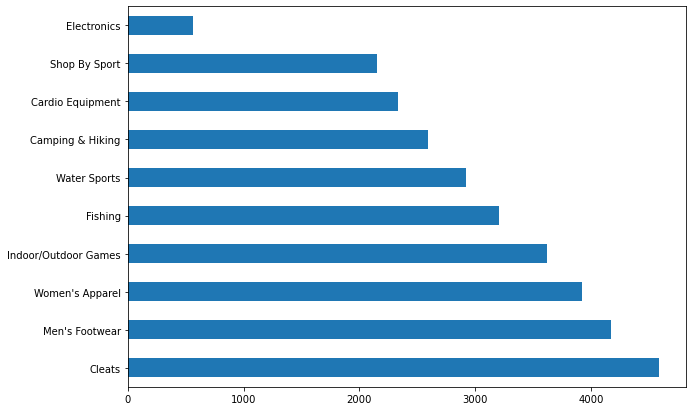

In [29]:
data['Category Name'][data['Benefit per order'] < 0].value_counts().nlargest(10).plot.barh(figsize=(10,7))

And which Regions?

<AxesSubplot:>

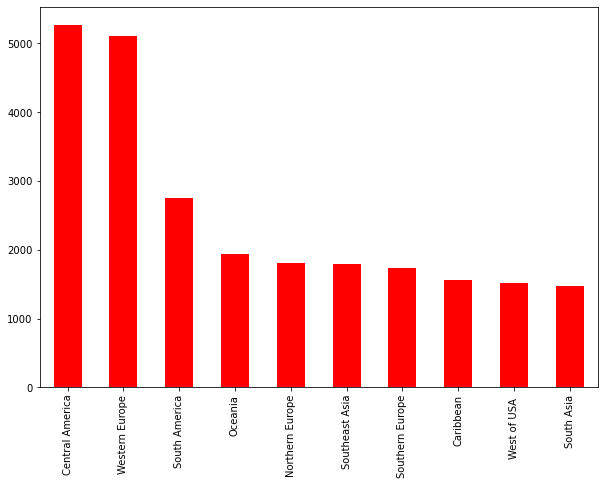

In [30]:
data['Order Region'][data['Benefit per order'] < 0].value_counts().nlargest(10).plot.bar(figsize=(10,7), color='red')

Total amount lost:

In [31]:
print('Total revenue lost with the loss orders:', data['Benefit per order'][data['Benefit per order'] < 0].sum())

Total revenue lost with the loss orders: -3883547.345768667


The total loss sales are approximately 3.9 Millions which is an huge amount. It can be seen that *cleats* is the category with most loss sales followed by *mens footwear*. Most lost sales are happening in *Central America* and *Western Europe* regions. This lost sales may have happened due to suspected frauds or due to inefficiencies in the supply chain process.

<hr>

**Preferred payment methods**
<br>
Here it is shown the usage of different payment methods across all the order regions to point out the most preferred ones.

In [32]:
debit = data[data['Type']== 'DEBIT'].groupby('Order Region')['Customer Id'].count()
transfer = data[data['Type']== 'TRANSFER'].groupby('Order Region')['Customer Id'].count()
cash = data[data['Type']== 'CASH'].groupby('Order Region')['Customer Id'].count()
payment = data[data['Type']== 'PAYMENT'].groupby('Order Region')['Customer Id'].count()

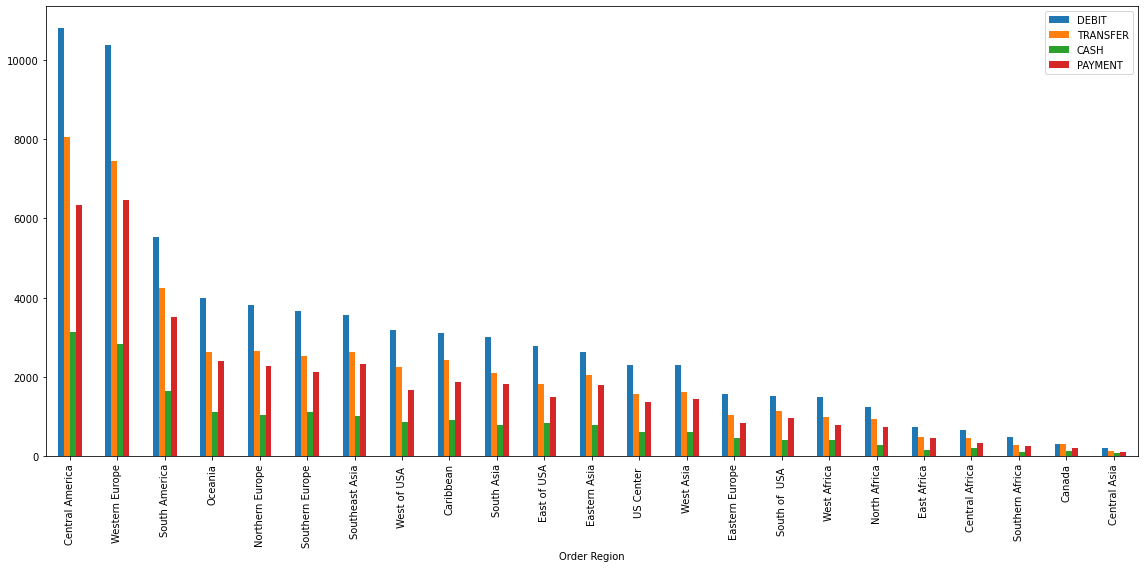

In [33]:
preferred_payment_region = pd.concat([debit, transfer, cash, payment], axis = 1)
preferred_payment_region.columns = ['DEBIT', 'TRANSFER', 'CASH', 'PAYMENT']
preferred_payment_region = preferred_payment_region.sort_values(by='DEBIT', ascending=False)

preferred_payment_region.plot.bar(figsize=(16,8))
plt.tight_layout();

*Debit* type is most preferred payment method by people in all regions, *Cash* payment being the least preferred method.

-----------------

**Analysis of fraudolent data**
<br>
Now, let's move on by analyzing the fraudolent orders in the dataset in order to notice and discover features or patterns that can conduct to a correct classification of a possible fraudolent order.
<br>
At first, a topdown approach is used to show the spread of suspected fraudolent orders starting from MARKETS, then REGIONS and finally the specific countries in the most fraudolent region.

In [34]:
fraud_markets = data[data['Order Status'] == 'SUSPECTED_FRAUD'].groupby('Market')['Customer Id'].count().sort_values(ascending=False)
fraud_regions = data[data['Order Status']== 'SUSPECTED_FRAUD'].groupby('Order Region')['Customer Id'].count().sort_values(ascending=False)
fraud_western_eu = data[(data['Order Status']== 'SUSPECTED_FRAUD') & (data['Order Region'] == 'Western Europe')].groupby('Order Country')['Customer Id'].count().sort_values(ascending=False)

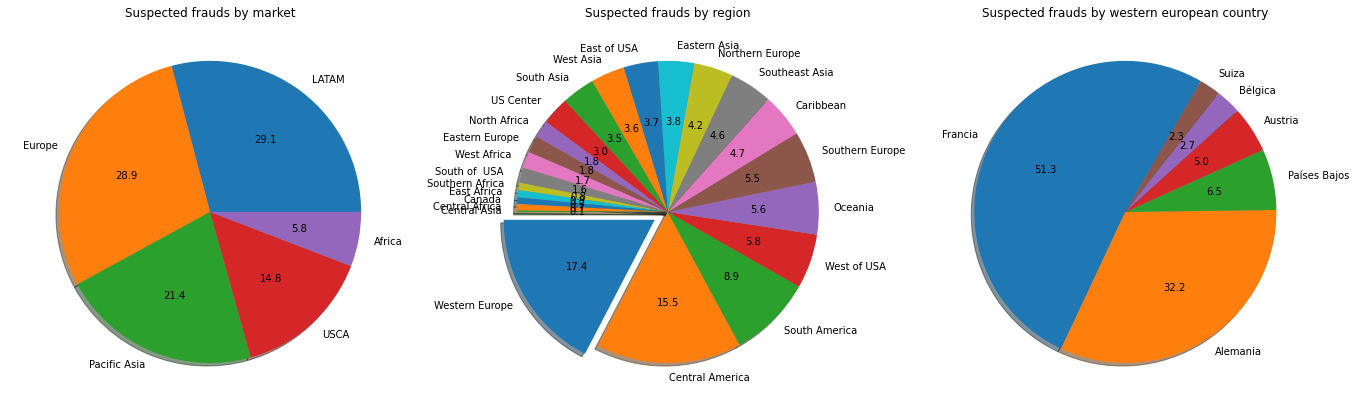

In [35]:
fig, ax = plt.subplots(ncols=3, figsize=(19, 22))

fraud_markets.plot.pie(ax=ax[0],
                       startangle=0,
                       autopct='%.1f',
                       shadow=True,
                       title='Suspected frauds by market',
                       ylabel=" ")

fraud_regions.plot.pie(ax=ax[1],
                       startangle=180,
                       explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),
                       autopct='%.1f',
                       shadow=True,
                       title='Suspected frauds by region',
                       ylabel= " ")

fraud_western_eu.plot.pie(ax=ax[2],
                          startangle=60,
                          autopct='%.1f',
                          shadow=True,
                          title='Suspected frauds by western european country',
                          ylabel=" ")

plt.tight_layout();

---------

*A dataframe containing only data with suspected frauds is created in order to ease the analysis going forward.*

In [36]:
fraud_df = data[data['Fraud'] == 1]

In [37]:
wes_eu = fraud_df[fraud_df['Order Region'] == 'Western Europe'].groupby('Category Name')['Customer Id'].count().nlargest(9).sort_values(ascending=False)
no_wes_eu = fraud_df[fraud_df['Order Region'] != 'Western Europe'].groupby('Category Name')['Product Category Id'].count().nlargest(9).sort_values(ascending=False)
stacked_df = pd.concat([wes_eu, no_wes_eu], axis=1)
stacked_df.rename(columns={'Customer Id':'Western EU', 'Product Category Id':'Rest of World'}, inplace=True)

Text(0, 0.5, '')

<Figure size 936x720 with 0 Axes>

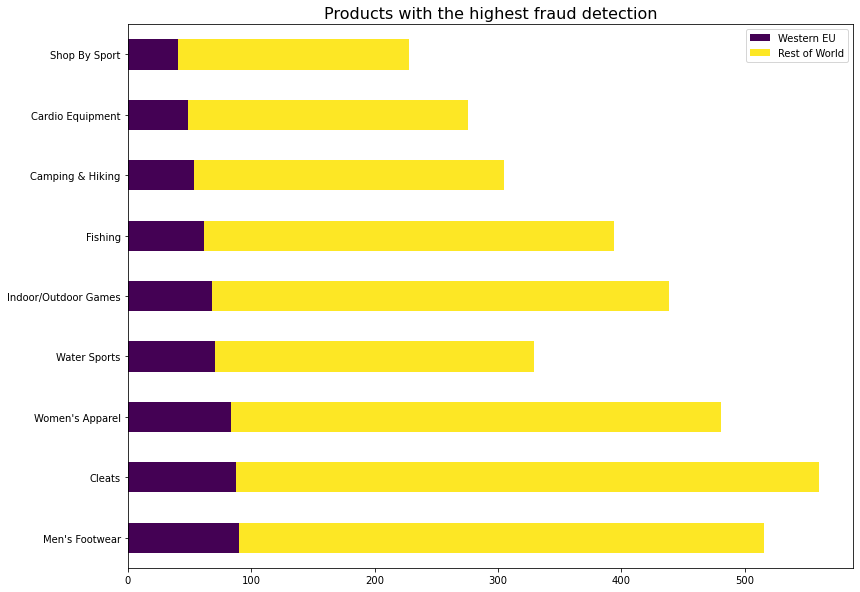

In [38]:
#Products with the highest Fraud detection (highlighting western EU vs Rest of World)
plt.figure(figsize=(13,10))

stacked_df.plot.barh(stacked=True, figsize=(13,10), colormap='viridis')

plt.title('Products with the highest fraud detection', fontsize=16)
plt.xlabel('')
plt.ylabel('')

<hr />

**Frauds by payment method**

In [39]:
data[data['Fraud'] == 1]['Type'].value_counts()

TRANSFER    4062
Name: Type, dtype: int64

*None of the suspected fraud orders have been made with a payment method different from TRANSFER.*

While the non-fraudolent orders are well diversified:

(array([0, 1, 2, 3]),
 [Text(0, 0, 'DEBIT'),
  Text(1, 0, 'TRANSFER'),
  Text(2, 0, 'PAYMENT'),
  Text(3, 0, 'CASH')])

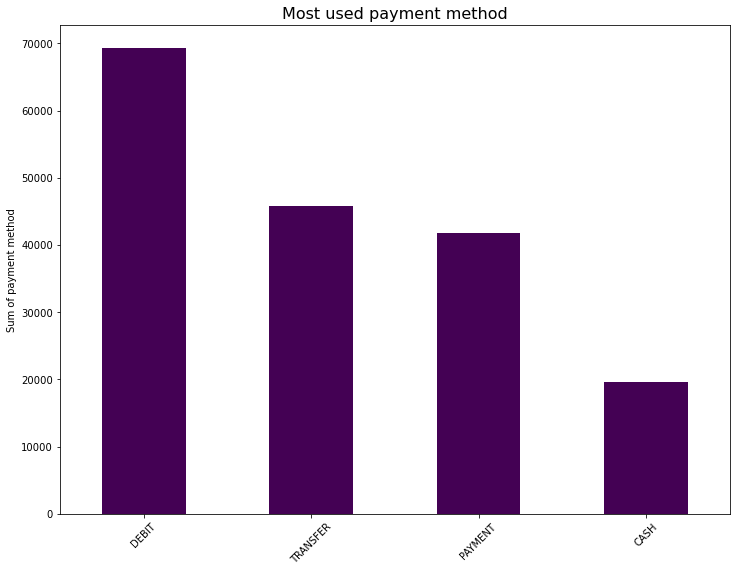

In [40]:
plt.figure(figsize=(12,9))
data[data['Fraud'] != 1]['Type'].value_counts().plot.bar(colormap='viridis')
plt.title('Most used payment method', fontsize=16)
plt.ylabel('Sum of payment method')
plt.xticks(rotation=45)

In [41]:
data[data['Fraud'] != 1]['Type'].value_counts()

DEBIT       69295
TRANSFER    45821
PAYMENT     41725
CASH        19616
Name: Type, dtype: int64

There are 3 different types of Customer Segments in the dataset, let's visualize how the fraudolent orders are distributed between them.


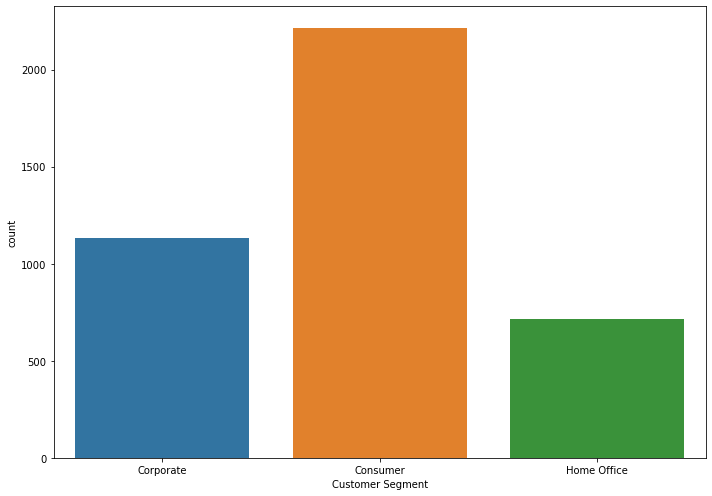

In [42]:
plt.figure(figsize=(10,7))
sns.countplot(x='Customer Segment', data=fraud_df)
plt.tight_layout();

More than half of suspected fraud orders are made by the consumer customer segment.

---------------

One of the last thing shown is whether the shipping mode and the delay of a product can play a role in the dection of fraudolent orders.

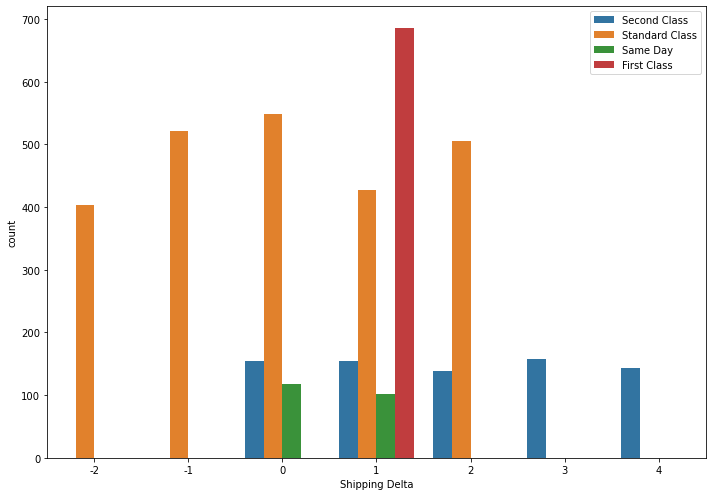

In [43]:
#FRAUDS BY Shipping Time (real) - Shipping time (scheduled) regarding the Shipping Mode
plt.figure(figsize=(10,7))

sns.countplot(x='Shipping Delta', hue='Shipping Mode', data=fraud_df)

plt.tight_layout()
plt.legend(loc='upper right')

We can see that most of the target orders are standard class, with also a huge spike of the *First Class* mode. The delay or not of a product does not play a significant role in the classification of a suspected fraud order.

----------

Which specific customers made the most frauds?

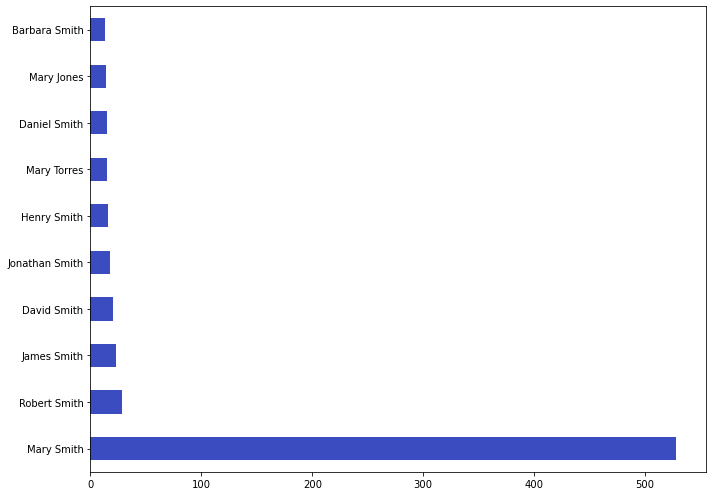

In [44]:
fraud_df['Customer Name'].value_counts().nlargest(10).plot.barh(figsize=(10,7), colormap='coolwarm')
plt.tight_layout()

In [45]:
fraud_df[fraud_df['Customer Name'] == 'Mary Smith'].head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late Delivery Risk,Category Name,Customer City,Customer Country,Customer Id,Customer Name,Customer Segment,Customer State,Customer Zipcode,Department Id,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,Shipping Delta,Fraud
687,TRANSFER,6,4,87.279999,193.949997,Shipping canceled,0,Shop By Sport,Caguas,Puerto Rico,2813,Mary Smith,Consumer,PR,725.0,5,LATAM,Atlixco,México,2/22/2015 21:38,3625,6.000000,0.03,9026,0.45,5,199.949997,193.949997,Central America,Puebla,SUSPECTED_FRAUD,627,29,Under Armour Girls' Toddler Spine Surge Runni,39.990002,Standard Class,2,1
749,TRANSFER,3,4,-63.160000,191.970001,Shipping canceled,0,Cleats,Brooklyn,EE. UU.,9419,Mary Smith,Consumer,NY,11207.0,4,Africa,Cairo,Egipto,11/2/2016 6:56,45987,47.990002,0.20,114931,-0.33,4,239.960007,191.970001,North Africa,El Cairo,SUSPECTED_FRAUD,365,17,Perfect Fitness Perfect Rip Deck,59.990002,Standard Class,-1,1
754,TRANSFER,3,4,20.000000,160.000000,Shipping canceled,0,Women's Apparel,Brooklyn,EE. UU.,9419,Mary Smith,Consumer,NY,11207.0,5,Africa,Cairo,Egipto,11/2/2016 6:56,45987,40.000000,0.20,114932,0.13,4,200.000000,160.000000,North Africa,El Cairo,SUSPECTED_FRAUD,502,24,Nike Men's Dri-FIT Victory Golf Polo,50.000000,Standard Class,-1,1
1791,TRANSFER,2,4,81.470001,232.759995,Shipping canceled,0,Cleats,Tonawanda,EE. UU.,11073,Mary Smith,Consumer,NY,14150.0,4,Europe,Bordeaux,Francia,8/30/2017 17:12,66636,7.200000,0.03,166570,0.35,4,239.960007,232.759995,Western Europe,Aquitania-Lemosín-Poitou-Charentes,SUSPECTED_FRAUD,365,17,Perfect Fitness Perfect Rip Deck,59.990002,Standard Class,-2,1
1893,TRANSFER,6,4,94.839996,278.950012,Shipping canceled,0,Cleats,Caguas,Puerto Rico,7270,Mary Smith,Consumer,PR,725.0,4,Pacific Asia,Nellore,India,12/26/2015 19:38,24650,21.000000,0.07,61721,0.34,5,299.950012,278.950012,South Asia,Andhra Pradesh,SUSPECTED_FRAUD,365,17,Perfect Fitness Perfect Rip Deck,59.990002,Standard Class,2,1


Seems like `Mary Smith` caused a lot of problems to companies, but it's hard to believe she made all those order (more or less, 500), which definetely outnumbers all the other customers.
<br>
We shall find out if she's likely a real person or just a so-called "front-man".

In [46]:
fraud_df[fraud_df['Customer Name'] == 'Mary Smith']['Customer Country'].unique()

array(['Puerto Rico', 'EE. UU.'], dtype=object)

In [47]:
fraud_df[fraud_df['Customer Name'] == 'Mary Smith']['Customer City'].unique()

array(['Caguas', 'Brooklyn', 'Tonawanda', 'Rosemead', 'Los Angeles',
       'Memphis', 'Wayne', 'Clearfield', 'East Brunswick', 'Chicago',
       'San Diego', 'Mount Pleasant', 'Portland', 'El Paso', 'Elyria',
       'Saint Paul', 'San Ramon', 'Bronx', 'Hanover', 'Hilliard',
       'Albuquerque', 'Mission Viejo', 'Tallahassee', 'Elmhurst',
       'Bismarck', 'West Orange', 'Elgin', 'Fountain Valley', 'Parkville',
       'Fort Washington', 'Richmond', 'Wyandotte', 'Endicott',
       'Irvington', 'West Chester', 'Ridgewood', 'Roswell', 'Brighton',
       'Ballwin', 'Lansdale', 'Trujillo Alto', 'Hendersonville', 'Ithaca',
       'San Jose', 'Lynwood', 'Miami', 'Tempe', 'Victorville',
       'Oceanside', 'Aurora', 'Bakersfield', 'Warren', 'Honolulu',
       'Raleigh', 'Modesto', 'Fort Worth', 'La Puente', 'Columbus',
       'New Haven', 'Hollywood', 'Newburgh', 'Las Vegas', 'Bayonne',
       'Sunnyvale', 'Fontana', 'Austin', 'New Orleans', 'Henrico',
       'Roseville', 'Hagerstown', 'Mass

The customer named `Mary Smith` alone was responible for trying to conduct fraud 528 times which is very shocking.
Since Mary was using different address every time when placing orders, a new customer id was issued each time which makes it difficult to identify the customer and ban them. She's likely a front-man.
<br>
All these parameters should be taken into consideration to improve fraud detection algorithm so fraud can be identified more accurately.

### **Data Modelling**

We make a copy of our dataset, so an eventual analysis can be made again.

In [48]:
train_data = data.copy()

In [49]:
train_data.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late Delivery Risk                 int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Id                        int64
Customer Name                     object
Customer Segment                  object
Customer State                    object
Customer Zipcode                  object
Department Id                      int64
Market                            object
Order City                        object
Order Country                     object
order date (DateOrders)           object
Order Id                           int64
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Id                      int64
Order Item Profi

In [50]:
train_data['Customer Zipcode'] = train_data['Customer Zipcode'].astype(int)

We prepare our train dataset removing some unnecessary features and popping the target variable.

In [51]:
train_data.drop(['Delivery Status', 'order date (DateOrders)', 'Order Status', 'Shipping Delta'], axis=1, inplace=True)

In [52]:
y = train_data.pop('Fraud')

##### **Label Encoding**

Before diving into the predictions, we have to encode our data, as statistical models have to work with numbers rather than strings.
<br>
We perform this operation the function `LabelEncoder()`.

In [53]:
le = preprocessing.LabelEncoder()
for column in train_data.columns:
  if train_data[column].dtype == 'object':
    train_data[column] = le.fit_transform(train_data[column])

In [94]:
train_data.tail(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late Delivery Risk,Category Name,Customer City,Customer Country,Customer Id,Customer Name,Customer Segment,Customer State,Customer Zipcode,Department Id,Market,Order City,Order Country,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Region,Order State,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode
180514,0,4,4,40.000000,399.980011,0,18,59,0,1005,8421,2,31,11207,7,3,2922,31,26043,0.0,0.00,65177,0.10,1,399.980011,399.980011,7,913,1004,45,24,399.980011,3
180515,1,3,2,-613.770019,395.980011,1,18,26,0,9141,11673,1,5,93304,7,3,1362,77,26037,4.0,0.01,65161,-1.55,1,399.980011,395.980011,7,770,1004,45,24,399.980011,2
180516,3,5,4,141.110001,391.980011,1,18,55,0,291,6296,1,7,6010,7,3,25,8,26024,8.0,0.02,65129,0.36,1,399.980011,391.980011,11,88,1004,45,24,399.980011,3
180517,2,3,4,186.229996,387.980011,0,18,66,1,2813,9380,0,36,725,7,3,25,8,26022,12.0,0.03,65126,0.48,1,399.980011,387.980011,11,88,1004,45,24,399.980011,3
180518,2,4,4,168.949997,383.980011,0,18,66,1,7547,658,0,36,725,7,3,2203,69,26018,16.0,0.04,65113,0.44,1,399.980011,383.980011,13,967,1004,45,24,399.980011,3


##### **Train/Test splitting**

We split our dataset into a train and a test set, and we get sure to have them exactly the same length.

In [55]:
X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.2, random_state=0)

In [56]:
X_train.shape, y_train.shape

((144415, 33), (144415,))

In [57]:
X_test.shape, y_test.shape

((36104, 33), (36104,))

##### **Standardization of Data**

The next step is to normalize the data: as some values outweight others, for example `Sales` compared to `Late Delivery Risk`, we do not want our models to think that the former are more important than the latter.
<br>
This process can be done throught the *Z-Score Normalization*, which consists of $\frac{value - μ}{σ}$.

In [58]:
sc = StandardScaler()

In [59]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

##### **Logistic Regression**

In [60]:
clf = LogisticRegression(solver='saga', max_iter=1000)

In [61]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [62]:
THRESHOLD = 0.4
preds = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
#probability threshold of logistic regression lowered to 40%, so it will classificate positively a suspected fraud when the probability of the observation in bigger than 40%

In [63]:
confusion_matrix(y_test, preds)

array([[34993,   268],
       [  527,   316]])

In [64]:
logistic_regression = pd.DataFrame(data=[
                                         accuracy_score(y_test, preds),
                                         recall_score(y_test, preds),
                                         precision_score(y_test, preds),
                                         f1_score(y_test, preds)
                                         ],
                                   index=['accuracy', 'recall', 'precision', 'f1 score'],
                                   columns=['Logistic Regression']).T

##### **Random Forest**

In [65]:
rf_classifier = RandomForestClassifier(random_state=0)

In [66]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [67]:
rf_pred = rf_classifier.predict(X_test)

In [68]:
confusion_matrix(y_test, rf_pred)

array([[35247,    14],
       [  451,   392]])

In [69]:
random_forest = pd.DataFrame(data=[
                                   accuracy_score(y_test, rf_pred),
                                   recall_score(y_test, rf_pred),
                                   precision_score(y_test, rf_pred),
                                   f1_score(y_test, rf_pred)
                                   ],
                             index=['accuracy', 'recall', 'precision', 'f1 score'],
                             columns=['Random Forest']).T

##### **K-Nearest-Neighbor**

We noticed that the author of the notebook set `n_neighbors` parameter to 1, which could lead to overfitting.
<br>
We decided to set it to 3.
<br>
Althought time and computionally demanding, the model must try to calculate distances for a fair amount of neighbors in order to correctly classify our data.

In [70]:
KNN_classifier = KNeighborsClassifier(n_neighbors=1)

In [71]:
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [72]:
knn_pred = KNN_classifier.predict(X_test)

In [73]:
confusion_matrix(y_test, knn_pred)

array([[34882,   379],
       [  545,   298]])

In [74]:
K_NN = pd.DataFrame(data=[
                          accuracy_score(y_test, knn_pred),
                          recall_score(y_test, knn_pred),
                          precision_score(y_test, knn_pred),
                          f1_score(y_test, knn_pred)
                          ],
                    index=['accuracy', 'recall', 'precision', 'f1 score'],
                    columns=['K-Nearest Neighbors']).T

##### **Decision Tree**

In [75]:
dec_tree = DecisionTreeClassifier()

In [76]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [77]:
dt_pred = dec_tree.predict(X_test)

In [78]:
confusion_matrix(y_test, dt_pred)

array([[35084,   177],
       [  175,   668]])

In [79]:
dec_tree_class = pd.DataFrame(data=[
                                    accuracy_score(y_test, dt_pred),
                                    recall_score(y_test, dt_pred),
                                    precision_score(y_test, dt_pred),
                                    f1_score(y_test, dt_pred)
                                    ],
                              index=['accuracy', 'recall', 'precision', 'f1 score'],
                              columns=['Decision Tree']).T

In [80]:
# from sklearn.metrics import ConfusionMatrixDisplay

# disp = ConfusionMatrixDisplay.from_estimator(dec_tree.fit(X_train, y_train),
#                                              X_test,
#                                              y_test,
#                                              display_labels=['Fraud', 'No Fraud'],
#                                              cmap=plt.cm.Blues)

# # disp.confusion_matrix

##### **Linear Discrimant Analysis**

In [81]:
LDA_model = LinearDiscriminantAnalysis()

In [82]:
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [83]:
LDA_prediction = LDA_model.predict(X_test)

In [84]:
confusion_matrix(y_test, LDA_prediction)

array([[34955,   306],
       [  484,   359]])

In [85]:
L_DA = pd.DataFrame(data=[
                          accuracy_score(y_test, LDA_prediction),
                          recall_score(y_test, LDA_prediction),
                          precision_score(y_test, LDA_prediction),
                          f1_score(y_test, LDA_prediction)
                          ],
                    index=['accuracy', 'recall', 'precision', 'f1 score'],
                    columns=['Linear Discriminant Analysis']).T

### **Model Comparison**

In [86]:
scores_table = pd.concat([K_NN, logistic_regression, dec_tree_class, random_forest, L_DA])

In [87]:
scores_table

,accuracy,recall,precision,f1 score
K-Nearest Neighbors,0.974407,0.353499,0.440177,0.392105
Logistic Regression,0.977980,0.374852,0.541096,0.442887
Decision Tree,0.990250,0.792408,0.790533,0.791469
Random Forest,0.987121,0.465006,0.965517,0.627702
Linear Discriminant Analysis,0.978119,0.425860,0.539850,0.476127


For this specific use-case, the metrics which are more useful are recall (i.e. the ability of the classifier to find all the positive samples.) and f1 score which combines both precision and recall into a single statistic.

**Decision Tree Classifier** outperformed all the others models in terms of accuracy and recall. Regarding this last point, what was important in the prediction is not to guess a `False` value (no fraud) whenever it was `True` (fraud), namely a `False negative`. This seems particularly important when dealing with classification when the variable you want to predict is in small portion in comparison to the totality of the samples.

In [88]:
suspected_fraud_ratio = len(data[data['Fraud'] == 1]) / len(data)
print('The ratio of suspected frauds over the total number of the orders provided is {}%.'.format(round(suspected_fraud_ratio*100, 2)))

The ratio of suspected frauds over the total number of the orders provided is 2.25%.


Now let's try a method to improve effectiveness of our model, **cross-validation**.
<br>
Although computationally expensive, it helps us understand if there was some sort of bias in splitting the data in the data modelling process.

In [89]:
models = []
models.append(('LR', clf))
models.append(('LDA', LDA_model))
models.append(('KNN', KNN_classifier))
models.append(('DTC', dec_tree))
models.append(('RF', rf_classifier))

In [90]:
results = []
names = []

In [ ]:
for name, model in models:
	kfold = KFold(n_splits=6, shuffle=True, random_state=7)
	cv_results = cross_val_score(model, train_data, y, cv=kfold, scoring='recall')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)